# Chennai_House_Price_Prediction_ANN


**Problem Statement**

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

**Minimum Requirements**

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.



## Importing the library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
df_raw = pd.read_csv('train-chennai-sale.csv')

In [3]:
df=df_raw.copy()

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
INT_SQFT,7109.0,1.382073e+03,4.574109e+02,500.0,993.00,1373.0,1744.00,2500.00
DIST_MAINROAD,7109.0,9.960318e+01,5.740311e+01,0.0,50.00,99.0,148.00,200.00
N_BEDROOM,7108.0,1.637029e+00,8.029016e-01,1.0,1.00,1.0,2.00,4.00
N_BATHROOM,7104.0,1.213260e+00,4.096387e-01,1.0,1.00,1.0,1.00,2.00
N_ROOM,7109.0,3.688704e+00,1.019099e+00,2.0,3.00,4.0,4.00,6.00
QS_ROOMS,7109.0,3.517471e+00,8.919724e-01,2.0,2.70,3.5,4.30,5.00
QS_BATHROOM,7109.0,3.507244e+00,8.978337e-01,2.0,2.70,3.5,4.30,5.00
QS_BEDROOM,7109.0,3.485300e+00,8.872664e-01,2.0,2.70,3.5,4.30,5.00
QS_OVERALL,7061.0,3.503254e+00,5.272229e-01,2.0,3.13,3.5,3.89,4.97
REG_FEE,7109.0,3.769383e+05,1.430707e+05,71177.0,272406.00,349486.0,451562.00,983922.00


In [7]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [8]:
df.shape

(7109, 22)

In [9]:
missing_data_ratio= (df.isna().sum()/df.shape[0])*100
missing_data_ratio

PRT_ID           0.000000
AREA             0.000000
INT_SQFT         0.000000
DATE_SALE        0.000000
DIST_MAINROAD    0.000000
N_BEDROOM        0.014067
N_BATHROOM       0.070333
N_ROOM           0.000000
SALE_COND        0.000000
PARK_FACIL       0.000000
DATE_BUILD       0.000000
BUILDTYPE        0.000000
UTILITY_AVAIL    0.000000
STREET           0.000000
MZZONE           0.000000
QS_ROOMS         0.000000
QS_BATHROOM      0.000000
QS_BEDROOM       0.000000
QS_OVERALL       0.675200
REG_FEE          0.000000
COMMIS           0.000000
SALES_PRICE      0.000000
dtype: float64

#### Missing data is less then 5%

In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7056 non-null   object 
 1   AREA           7056 non-null   object 
 2   INT_SQFT       7056 non-null   int64  
 3   DATE_SALE      7056 non-null   object 
 4   DIST_MAINROAD  7056 non-null   int64  
 5   N_BEDROOM      7056 non-null   float64
 6   N_BATHROOM     7056 non-null   float64
 7   N_ROOM         7056 non-null   int64  
 8   SALE_COND      7056 non-null   object 
 9   PARK_FACIL     7056 non-null   object 
 10  DATE_BUILD     7056 non-null   object 
 11  BUILDTYPE      7056 non-null   object 
 12  UTILITY_AVAIL  7056 non-null   object 
 13  STREET         7056 non-null   object 
 14  MZZONE         7056 non-null   object 
 15  QS_ROOMS       7056 non-null   float64
 16  QS_BATHROOM    7056 non-null   float64
 17  QS_BEDROOM     7056 non-null   float64
 18  QS_OVERA

In [12]:
df['AREA'].nunique()

17

## Data Processing Column wise

#### 'PRT_ID','AREA'

In [13]:
df= df.drop(['PRT_ID','AREA'],axis=1)

#### 'DATE_SALE'

In [14]:
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])

In [15]:
df['DATE_SALE_YEAR']=df.DATE_SALE.dt.year

In [16]:
df['DATE_SALE_MONTH']=df.DATE_SALE.dt.month

In [17]:
#df['DATE_SALE_DOY']=df.DATE_SALE.dt.day_of_year

In [18]:
df=df.drop('DATE_SALE',axis=1)

#### SALE_COND 

In [19]:
df['SALE_COND'].nunique()

9

In [20]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   INT_SQFT         7056 non-null   int64  
 1   DIST_MAINROAD    7056 non-null   int64  
 2   N_BEDROOM        7056 non-null   float64
 3   N_BATHROOM       7056 non-null   float64
 4   N_ROOM           7056 non-null   int64  
 5   SALE_COND        7056 non-null   object 
 6   PARK_FACIL       7056 non-null   object 
 7   DATE_BUILD       7056 non-null   object 
 8   BUILDTYPE        7056 non-null   object 
 9   UTILITY_AVAIL    7056 non-null   object 
 10  STREET           7056 non-null   object 
 11  MZZONE           7056 non-null   object 
 12  QS_ROOMS         7056 non-null   float64
 13  QS_BATHROOM      7056 non-null   float64
 14  QS_BEDROOM       7056 non-null   float64
 15  QS_OVERALL       7056 non-null   float64
 16  REG_FEE          7056 non-null   int64  
 17  COMMIS        

In [22]:
df.groupby('SALE_COND').size()

SALE_COND
Ab Normal         5
AbNormal       1396
Adj Land          6
AdjLand        1426
Family         1390
Normal Sale    1416
PartiaLl          1
Partial        1414
Partiall          2
dtype: int64

In [23]:
df['SALE_COND']=df['SALE_COND'].map({'AbNormal':1,'Ab Normal':1,'Family':2,'Partial':3,
                                        'Partiall':3,'PartiaLl':3,'AdjLand':4,'Adj Land':4,'Normal Sale':5})

In [24]:
df['SALE_COND'].nunique()

5

In [25]:
df['SALE_COND'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [26]:
df['SALE_COND']=df['SALE_COND'].map({1:'AbNormal',2:'Family',3:'Partial',
                                     4:'AdjLand',5:'Normal Sale'})

In [27]:
df['SALE_COND'].nunique()

5

In [28]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [29]:
'''df['SALE_COND_N'] = np.NaN
for i,j in enumerate (df['SALE_COND']):
    if(j=='AbNormal'):
        df['SALE_COND_N'][i] = 'AbNormal'
    elif(j=='Ab Normal'):
        df['SALE_COND_N'][i] = 'AbNormal'
    elif(j=='Family'):
        df['SALE_COND_N'][i] = 'Family'
    elif(j=='Partial'):
        df['SALE_COND_N'][i] = 'Partial'
    elif(j=='Partiall'):
        df['SALE_COND_N'][i] = 'Partial'
    elif(j=='PartiaLl'):
        df['SALE_COND_N'][i] = 'Partial'
    elif(j=='AdjLand'):
        df['SALE_COND_N'][i] = 'AdjLand'
    elif(j=='Adj Land'):
        df['SALE_COND_N'][i] = 'AdjLand'
    else:
        df['SALE_COND_N'][i] = 'Normal Sale' '''

"df['SALE_COND_N'] = np.NaN\nfor i,j in enumerate (df['SALE_COND']):\n    if(j=='AbNormal'):\n        df['SALE_COND_N'][i] = 'AbNormal'\n    elif(j=='Ab Normal'):\n        df['SALE_COND_N'][i] = 'AbNormal'\n    elif(j=='Family'):\n        df['SALE_COND_N'][i] = 'Family'\n    elif(j=='Partial'):\n        df['SALE_COND_N'][i] = 'Partial'\n    elif(j=='Partiall'):\n        df['SALE_COND_N'][i] = 'Partial'\n    elif(j=='PartiaLl'):\n        df['SALE_COND_N'][i] = 'Partial'\n    elif(j=='AdjLand'):\n        df['SALE_COND_N'][i] = 'AdjLand'\n    elif(j=='Adj Land'):\n        df['SALE_COND_N'][i] = 'AdjLand'\n    else:\n        df['SALE_COND_N'][i] = 'Normal Sale' "

In [30]:
df.groupby('SALE_COND').size()

SALE_COND
AbNormal       1401
AdjLand        1432
Family         1390
Normal Sale    1416
Partial        1417
dtype: int64

In [31]:
SALE_COND=pd.get_dummies(df['SALE_COND'],drop_first=True)

In [32]:
df=pd.concat([df,SALE_COND],axis=1)
df.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,DATE_SALE_YEAR,DATE_SALE_MONTH,AdjLand,Family,Normal Sale,Partial
0,1004,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,4,0,0,0,0
1,1986,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,12,0,0,0,0
2,909,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,4,0,0,0,0
3,1855,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,3,0,1,0,0
4,1226,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,5,0,0,0,0


#### PARK_FACIL

In [33]:
df["PARK_FACIL"].nunique()

3

In [34]:
df["PARK_FACIL"].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [35]:
df['PARK_FACIL']=df["PARK_FACIL"].map({'Yes':1,'No':0,'Noo':0})

In [36]:
df["PARK_FACIL"].unique()

array([1, 0], dtype=int64)

#### DATE_BUILD

In [37]:
df['DATE_BUILD']

0       15-05-1967
1       22-12-1995
2       09-02-1992
3       18-03-1988
4       13-10-1979
           ...    
7104    15-01-1962
7105    11-04-1995
7106    01-09-1978
7107    11-08-1977
7108    24-07-1961
Name: DATE_BUILD, Length: 7056, dtype: object

In [38]:
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])

In [39]:
df['BUILT_Year']=df.DATE_BUILD.dt.year

In [40]:
df['AGE_BUILDING']=df['DATE_SALE_YEAR']-df['BUILT_Year']

In [41]:
df=df.drop(['SALE_COND','DATE_BUILD','BUILT_Year','DATE_SALE_YEAR'],axis=1)
df.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,DATE_SALE_MONTH,AdjLand,Family,Normal Sale,Partial,AGE_BUILDING
0,1004,131,1.0,1.0,3,1,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,4,0,0,0,0,44
1,1986,26,2.0,1.0,5,0,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,12,0,0,0,0,11
2,909,70,1.0,1.0,3,1,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,4,0,0,0,0,20
3,1855,14,3.0,2.0,5,0,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,3,0,1,0,0,22
4,1226,84,1.0,1.0,3,1,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,5,0,0,0,0,30


#### BUILDTYPE

In [42]:
df['BUILDTYPE'].nunique()

5

In [43]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [44]:
df['BUILDTYPE']=df['BUILDTYPE'].replace(dict.fromkeys(['Others','Other'], 'others'))

In [45]:
df['BUILDTYPE']=df['BUILDTYPE'].replace(dict.fromkeys(['Commercial','Comercial'], 'Commercial'))

In [46]:
df['BUILDTYPE'].unique()

array(['Commercial', 'others', 'House'], dtype=object)

In [47]:
BUILDTYPE=pd.get_dummies(df['BUILDTYPE'],drop_first=True)

In [48]:
df=pd.concat([df,BUILDTYPE],axis=1)

In [49]:
df=df.drop('BUILDTYPE',axis=1)
df.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,DATE_SALE_MONTH,AdjLand,Family,Normal Sale,Partial,AGE_BUILDING,House,others
0,1004,131,1.0,1.0,3,1,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,4,0,0,0,0,44,0,0
1,1986,26,2.0,1.0,5,0,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,12,0,0,0,0,11,0,0
2,909,70,1.0,1.0,3,1,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,4,0,0,0,0,20,0,0
3,1855,14,3.0,2.0,5,0,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,3,0,1,0,0,22,0,1
4,1226,84,1.0,1.0,3,1,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,5,0,0,0,0,30,0,1


#### UTILITY_AVAIL	

In [50]:
df['UTILITY_AVAIL'].nunique()

5

In [51]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [52]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].replace(dict.fromkeys(['AllPub','All Pub'],'AllPub'))

In [53]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].replace(dict.fromkeys(['NoSewr ','NoSeWa'],'NoSeWa'))

In [54]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSeWa'], dtype=object)

In [55]:
UTILITY_AVAIL=pd.get_dummies(df['UTILITY_AVAIL'],drop_first=True)

In [56]:
df=pd.concat([df,UTILITY_AVAIL],axis=1)

In [57]:
df=df.drop('UTILITY_AVAIL',axis=1)
df.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,DATE_SALE_MONTH,AdjLand,Family,Normal Sale,Partial,AGE_BUILDING,House,others,ELO,NoSeWa
0,1004,131,1.0,1.0,3,1,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,4,0,0,0,0,44,0,0,0,0
1,1986,26,2.0,1.0,5,0,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,12,0,0,0,0,11,0,0,0,0
2,909,70,1.0,1.0,3,1,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,4,0,0,0,0,20,0,0,1,0
3,1855,14,3.0,2.0,5,0,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,3,0,1,0,0,22,0,1,0,1
4,1226,84,1.0,1.0,3,1,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,5,0,0,0,0,30,0,1,0,0


#### STREET

In [58]:
df['STREET'].nunique()

5

In [59]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [60]:
df['STREET']=df['STREET'].replace(dict.fromkeys(['Paved','Pavd'],'Paved'))

In [61]:
df['STREET']=df['STREET'].replace(dict.fromkeys(['No Access','NoAccess'],'NoAccess'))

In [62]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'NoAccess'], dtype=object)

In [63]:
STREET=pd.get_dummies(df['STREET'],drop_first=True)

In [64]:
df= pd.concat([df,STREET],axis=1)

In [65]:
df=df.drop('STREET',axis=1)
df.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,DATE_SALE_MONTH,AdjLand,Family,Normal Sale,Partial,AGE_BUILDING,House,others,ELO,NoSeWa,NoAccess,Paved
0,1004,131,1.0,1.0,3,1,A,4.0,3.9,4.9,4.330,380000,144400,7600000,4,0,0,0,0,44,0,0,0,0,0,1
1,1986,26,2.0,1.0,5,0,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,12,0,0,0,0,11,0,0,0,0,0,0
2,909,70,1.0,1.0,3,1,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,4,0,0,0,0,20,0,0,1,0,0,0
3,1855,14,3.0,2.0,5,0,I,4.7,3.9,3.6,4.010,356321,77042,9630290,3,0,1,0,0,22,0,1,0,1,0,1
4,1226,84,1.0,1.0,3,1,C,3.0,2.5,4.1,3.290,237000,74063,7406250,5,0,0,0,0,30,0,1,0,0,0,0


#### MZZONE

In [66]:
df['MZZONE'].nunique()

6

In [67]:
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [68]:
MZZONE=pd.get_dummies(df['MZZONE'],drop_first=True)
df=pd.concat([df,MZZONE],axis=1)
df=df.drop('MZZONE',axis=1)
df.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,DATE_SALE_MONTH,AdjLand,Family,Normal Sale,Partial,AGE_BUILDING,House,others,ELO,NoSeWa,NoAccess,Paved,C,I,RH,RL,RM
0,1004,131,1.0,1.0,3,1,4.0,3.9,4.9,4.330,380000,144400,7600000,4,0,0,0,0,44,0,0,0,0,0,1,0,0,0,0,0
1,1986,26,2.0,1.0,5,0,4.9,4.2,2.5,3.765,760122,304049,21717770,12,0,0,0,0,11,0,0,0,0,0,0,0,0,1,0,0
2,909,70,1.0,1.0,3,1,4.1,3.8,2.2,3.090,421094,92114,13159200,4,0,0,0,0,20,0,0,1,0,0,0,0,0,0,1,0
3,1855,14,3.0,2.0,5,0,4.7,3.9,3.6,4.010,356321,77042,9630290,3,0,1,0,0,22,0,1,0,1,0,1,0,1,0,0,0
4,1226,84,1.0,1.0,3,1,3.0,2.5,4.1,3.290,237000,74063,7406250,5,0,0,0,0,30,0,1,0,0,0,0,1,0,0,0,0


In [69]:
df.columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'PARK_FACIL', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'REG_FEE', 'COMMIS', 'SALES_PRICE', 'DATE_SALE_MONTH', 'AdjLand',
       'Family', 'Normal Sale', 'Partial', 'AGE_BUILDING', 'House', 'others',
       'ELO', 'NoSeWa', 'NoAccess', 'Paved', 'C', 'I', 'RH', 'RL', 'RM'],
      dtype='object')

In [70]:
df=df[['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'PARK_FACIL', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'REG_FEE', 'COMMIS', 'SALES_PRICE', 'DATE_SALE_MONTH', 'AGE_BUILDING','AdjLand',
       'Family', 'Normal Sale', 'Partial',  'House', 'others',
       'ELO', 'NoSeWa', 'NoAccess', 'Paved', 'C', 'I', 'RH', 'RL', 'RM']]

In [71]:
df.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,DATE_SALE_MONTH,AGE_BUILDING,AdjLand,Family,Normal Sale,Partial,House,others,ELO,NoSeWa,NoAccess,Paved,C,I,RH,RL,RM
0,1004,131,1.0,1.0,3,1,4.0,3.9,4.9,4.330,380000,144400,7600000,4,44,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1986,26,2.0,1.0,5,0,4.9,4.2,2.5,3.765,760122,304049,21717770,12,11,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,909,70,1.0,1.0,3,1,4.1,3.8,2.2,3.090,421094,92114,13159200,4,20,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,1855,14,3.0,2.0,5,0,4.7,3.9,3.6,4.010,356321,77042,9630290,3,22,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0
4,1226,84,1.0,1.0,3,1,3.0,2.5,4.1,3.290,237000,74063,7406250,5,30,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


#### As Reg_free, Commision Wiil not havean effect on price we will drop the column

In [72]:
df=df.drop(['REG_FEE','COMMIS'],axis=1)
df.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,DATE_SALE_MONTH,AGE_BUILDING,AdjLand,Family,Normal Sale,Partial,House,others,ELO,NoSeWa,NoAccess,Paved,C,I,RH,RL,RM
0,1004,131,1.0,1.0,3,1,4.0,3.9,4.9,4.330,7600000,4,44,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1986,26,2.0,1.0,5,0,4.9,4.2,2.5,3.765,21717770,12,11,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,909,70,1.0,1.0,3,1,4.1,3.8,2.2,3.090,13159200,4,20,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,1855,14,3.0,2.0,5,0,4.7,3.9,3.6,4.010,9630290,3,22,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0
4,1226,84,1.0,1.0,3,1,3.0,2.5,4.1,3.290,7406250,5,30,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


## EDA

In [73]:
df1=df.copy()

In [74]:
df1=df1.drop(['AdjLand',
       'Family', 'Normal Sale', 'Partial',  'House', 'others',
       'ELO', 'NoSeWa', 'NoAccess', 'Paved', 'C', 'I', 'RH', 'RL', 'RM'],axis=1)

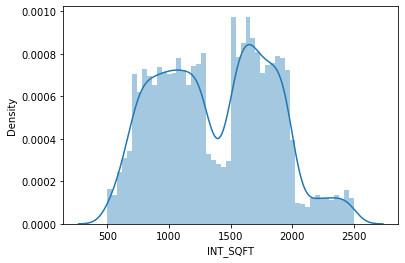

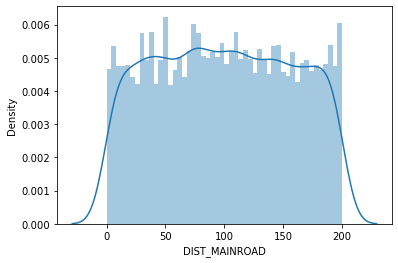

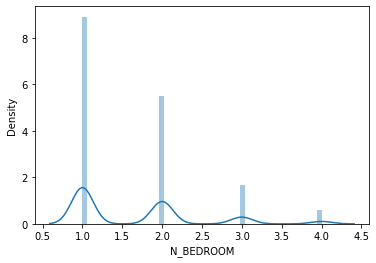

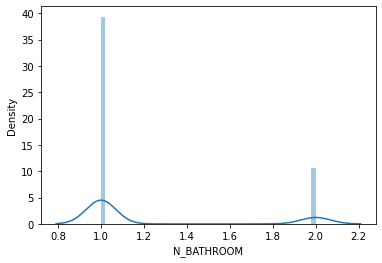

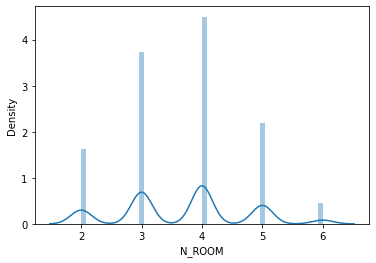

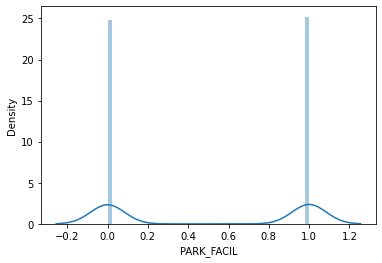

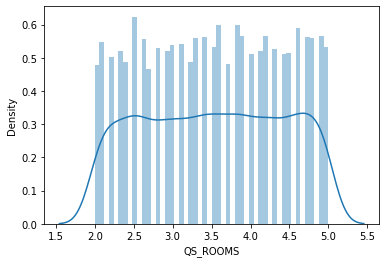

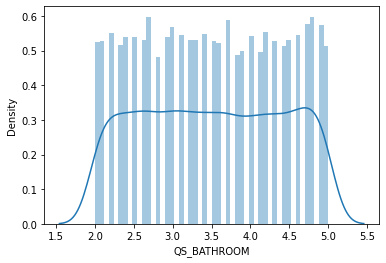

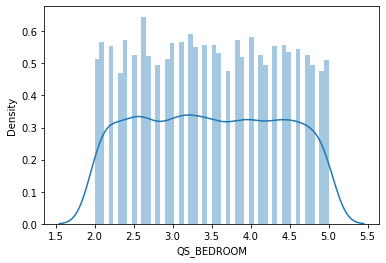

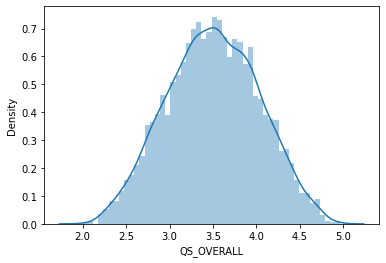

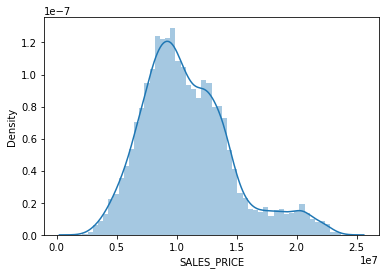

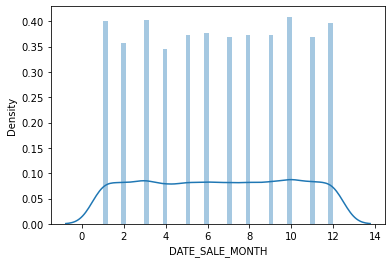

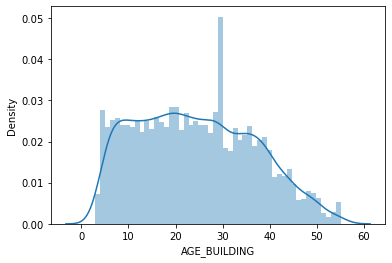

In [75]:
for i in df1.columns:
    sns.distplot(df[i],bins=50)
    plt.show()

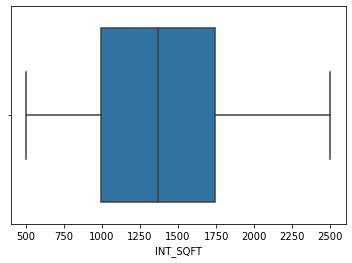

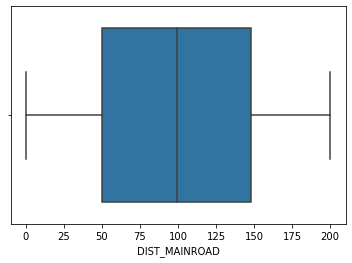

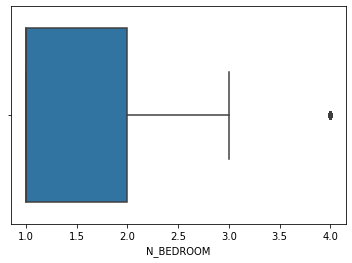

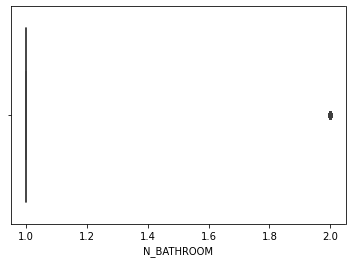

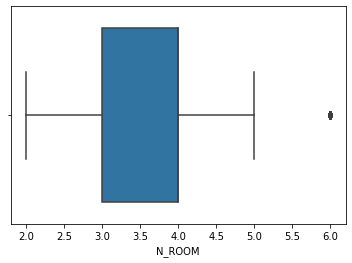

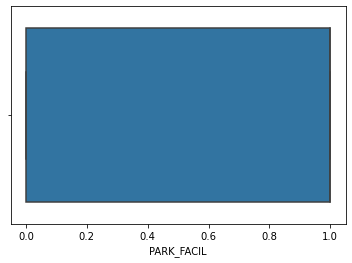

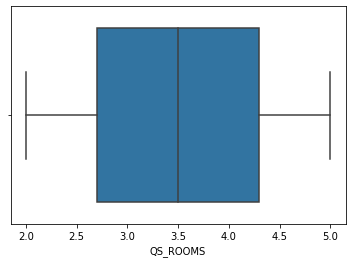

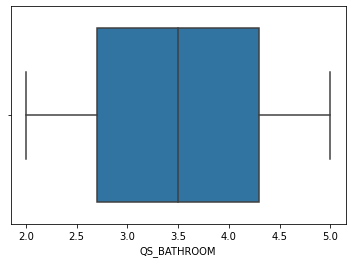

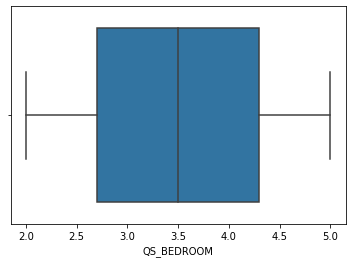

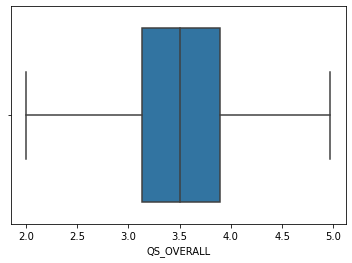

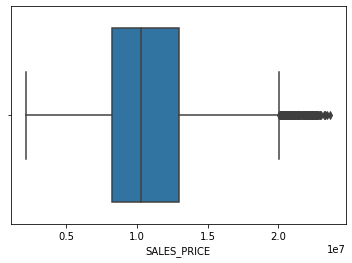

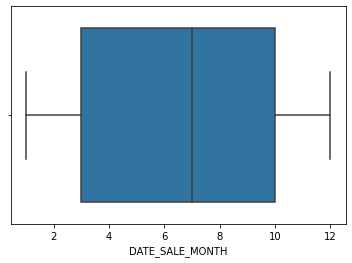

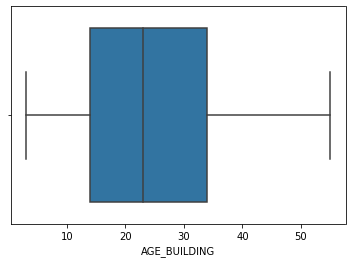

In [76]:
for i in df1.columns:
    sns.boxplot(df[i])
    plt.show()

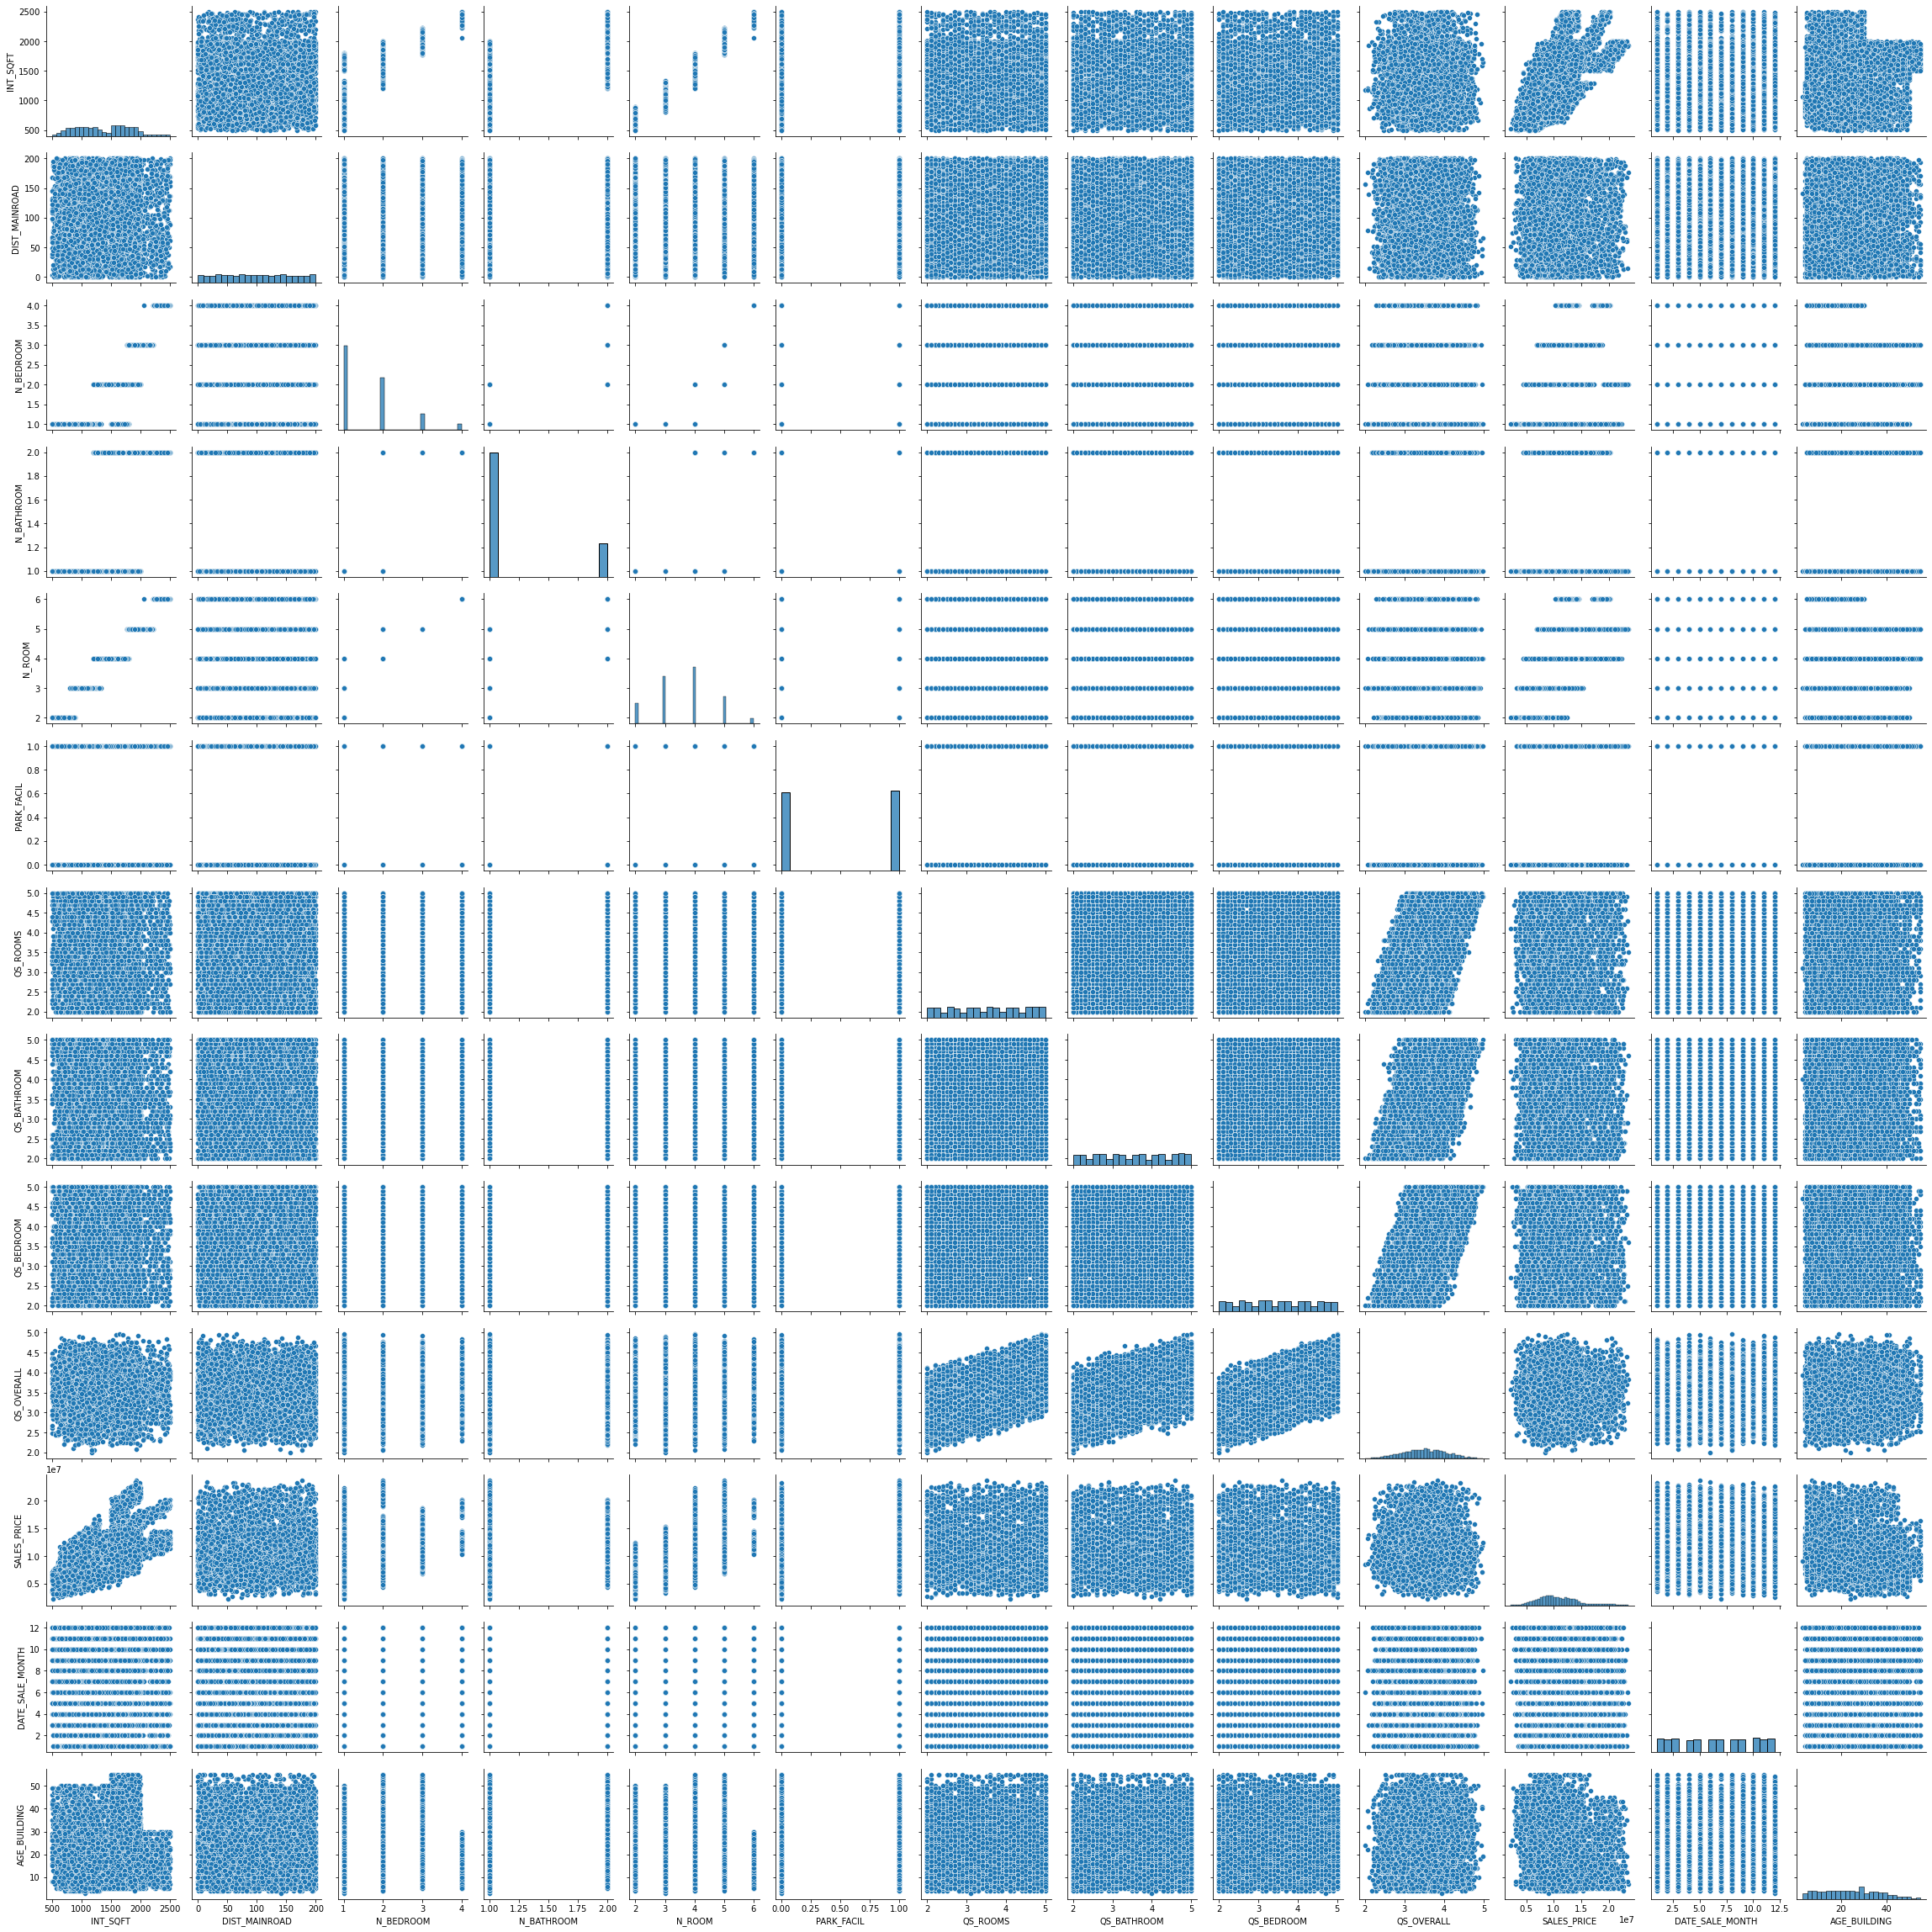

In [77]:
sns.pairplot(df1)

## Training and Test Data

In [78]:
X=df.drop('SALES_PRICE',axis=1)
y=df['SALES_PRICE']

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [81]:
X_train.shape

(5644, 27)

## Model Preparation

In [82]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [83]:
model = Sequential()

model.add(Dense(27,activation='relu'))

model.add(Dense(14,activation='relu'))

model.add(Dense(14,activation='relu'))

model.add(Dense(14,activation='relu'))

model.add(Dense(12,activation='relu'))

model.add(Dense(10,activation='relu'))

model.add(Dense(6,activation='relu'))

model.add(Dense(1))

model.compile(loss='mse',optimizer='adam',metrics=['mse'])


In [84]:
model.fit(x=X_train,
    y=y_train,
    batch_size=32,
    epochs=100,
    verbose=1,
    validation_data=(X_test,y_test))

Epoch 1/100
177/177 [==============================] - 7s 8ms/step - loss: 133391282339840.0000 - mse: 133391282339840.0000 - val_loss: 130153447424000.0000 - val_mse: 130153447424000.0000
Epoch 2/100
177/177 [==============================] - 1s 3ms/step - loss: 106315774951424.0000 - mse: 106315774951424.0000 - val_loss: 12713007775744.0000 - val_mse: 12713007775744.0000
Epoch 3/100
177/177 [==============================] - 1s 3ms/step - loss: 10079089721344.0000 - mse: 10079089721344.0000 - val_loss: 10006658285568.0000 - val_mse: 10006658285568.0000
Epoch 4/100
177/177 [==============================] - 1s 3ms/step - loss: 9940125089792.0000 - mse: 9940125089792.0000 - val_loss: 9953901281280.0000 - val_mse: 9953901281280.0000
Epoch 5/100
177/177 [==============================] - 1s 3ms/step - loss: 9923239870464.0000 - mse: 9923239870464.0000 - val_loss: 10089637347328.0000 - val_mse: 10089637347328.0000
Epoch 6/100
177/177 [==============================] - 0s 3ms/step - loss: 

In [85]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

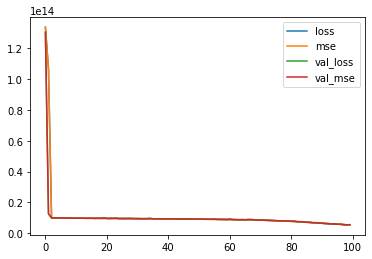

In [86]:
losses.plot()

## Evaluation on Test Data

In [87]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score

In [88]:
P1=model.predict(X_test)

print(mean_absolute_error(y_test,P1))
print(mean_squared_error(y_test,P1))
print(r2_score(y_test,P1))

1888162.403328612
5641889338633.715
0.5911952179282992


### Early Stopping

In [89]:
model1 = Sequential()

model1.add(Dense(27,activation='relu'))

model1.add(Dense(14,activation='relu'))

model1.add(Dense(14,activation='relu'))

model1.add(Dense(14,activation='relu'))

model1.add(Dense(12,activation='relu'))

model1.add(Dense(10,activation='relu'))

model1.add(Dense(6,activation='relu'))

model1.add(Dense(1))

model1.compile(loss='mse',optimizer='adam',metrics=['mse'])


In [90]:
early= EarlyStopping(monitor='val_loss',
    patience=25,
    mode='min')

In [91]:
model1.fit(x=X_train,
    y=y_train,
    batch_size=32,
    epochs=600,
    verbose=1,
    validation_data=(X_test,y_test),callbacks=[early])

Epoch 1/600
177/177 [==============================] - 2s 4ms/step - loss: 133311120801792.0000 - mse: 133311120801792.0000 - val_loss: 129263416115200.0000 - val_mse: 129263416115200.0000
Epoch 2/600
177/177 [==============================] - 1s 3ms/step - loss: 71328031834112.0000 - mse: 71328031834112.0000 - val_loss: 9979799011328.0000 - val_mse: 9979799011328.0000
Epoch 3/600
177/177 [==============================] - 1s 3ms/step - loss: 9945847169024.0000 - mse: 9945847169024.0000 - val_loss: 10056816918528.0000 - val_mse: 10056816918528.0000
Epoch 4/600
177/177 [==============================] - 1s 3ms/step - loss: 9925863407616.0000 - mse: 9925863407616.0000 - val_loss: 10014348541952.0000 - val_mse: 10014348541952.0000
Epoch 5/600
177/177 [==============================] - 1s 3ms/step - loss: 9909247672320.0000 - mse: 9909247672320.0000 - val_loss: 9967291596800.0000 - val_mse: 9967291596800.0000
Epoch 6/600
177/177 [==============================] - 1s 3ms/step - loss: 989860

In [92]:
losses = pd.DataFrame(model1.history.history)

<AxesSubplot:>

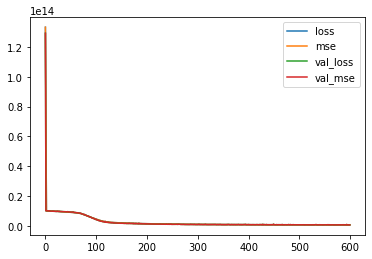

In [93]:
losses.plot()

In [94]:
P1=model1.predict(X_test)

print(mean_absolute_error(y_test,P1))
print(mean_squared_error(y_test,P1))
print(r2_score(y_test,P1))

556972.8893413597
528153456245.4228
0.9617306108607383


In [95]:
accuracy=r2_score(y_test,P1)
accuracy

0.9617306108607383

In [97]:
predicted_Price=model.predict(X_test[:1])

Price_at_max_accuracy=(predicted_Price*(accuracy))
Price_range= Price_at_max_accuracy-predicted_Price

min_Price=predicted_Price+Price_range
max_Price=predicted_Price-Price_range

print('Sale Price Ranges From',max_Price,'to', min_Price)

Sale Price Ranges From [[12347997.]] to [[11437731.]]
